<a href="https://colab.research.google.com/github/Aninha-create/Alura_final/blob/main/challenge2X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Challenge segunda parte: Analisando e prevendo a evas√£o de clientes na empresa TelecomX com estat√≠stica e modelo preditivo.
---

Objetivos do Projeto
- Realizar o pr√©-processamento dos dados, incluindo limpeza, codifica√ß√£o de vari√°veis categ√≥ricas e padroniza√ß√£o dos valores, preparando o conjunto para a etapa de modelagem.
- Investigar as rela√ß√µes entre as vari√°veis por meio de an√°lise de correla√ß√£o, identificando quais atributos t√™m maior relev√¢ncia para o problema.
- Implementar e treinar pelo menos dois algoritmos de classifica√ß√£o, comparando seus desempenhos.
- Avaliar os modelos com base em m√©tricas apropriadas, como acur√°cia, precis√£o, recall e F1-score, al√©m de interpretar os resultados obtidos.
- Apontar, com base nas an√°lises, os principais fatores que contribuem para a evas√£o de clientes, oferecendo uma conclus√£o estrat√©gica que possa orientar a√ß√µes futuras.
---


##Carregando os dados para in√≠cio das an√°lises

In [2]:
import pandas as pd
pd.read_csv('/content/dados_tratados (1).csv')
df = pd.read_csv('/content/dados_tratados (1).csv')

In [3]:
#visualizando o dataframe
df.head()

genero  idoso possui_parceiro dependentes  meses_com_empresa  \
0  female      0             yes         yes                  9   
1    male      0              no          no                  9   
2    male      0              no          no                  4   
3    male      1             yes          no                 13   
4  female      1             yes          no                  3   

  servico_telefone multiplas_linhas tipo_internet seguranca_online  \
0              yes               no           dsl               no   
1              yes              yes           dsl               no   
2              yes               no   fiber optic               no   
3              yes               no   fiber optic               no   
4              yes               no   fiber optic               no   

  backup_online  ... streaming_tv streaming_filmes   tipo_contrato  \
0           yes  ...          yes               no        one year   
1            no  ...           no              yes  month-to-month   
2            no  ...           no               no  month-to-month   
3           yes  ...          yes              yes  month-to-month   
4            no  ...          yes               no  month-to-month   

  fatura_digital  metodo_pagamento conta_diaria cobranca_mensal  \
0            yes      mailed check         2.19            65.6   
1             no      mailed check         2.00            59.9   
2            yes  electronic check         2.46            73.9   
3            yes  electronic check         3.27            98.0   
4            yes      mailed check         2.80            83.9   

   cobranca_total  id_cliente  evas√£o  
0          593.30  0002-orfbo      no  
1          542.40  0003-mknfe      no  
2          280.85  0004-tlhlj     yes  
3         1237.85  0011-igkff     yes  
4          267.40  0013-exchz     yes  

[5 rows x 22 columns]

In [4]:
ordem_colunas = [
    'evas√£o',
    'meses_com_empresa',
    'cobranca_mensal',
    'cobranca_total',
    'genero',
    'idoso',
    'possui_parceiro',
    'dependentes',
    'servico_telefone',
    'tipo_internet',
    'streaming_tv',
    'streaming_filmes',
    'tipo_contrato',
    'fatura_digital',
    'metodo_pagamento',
    'multiplas_linhas',
    'seguranca_online',
    'backup_online',
    'id_cliente', 'conta_diaria'
]

In [5]:
df = df[ordem_colunas]
df.head()

evas√£o  meses_com_empresa  cobranca_mensal  cobranca_total  genero  idoso  \
0     no                  9             65.6          593.30  female      0   
1     no                  9             59.9          542.40    male      0   
2    yes                  4             73.9          280.85    male      0   
3    yes                 13             98.0         1237.85    male      1   
4    yes                  3             83.9          267.40  female      1   

  possui_parceiro dependentes servico_telefone tipo_internet streaming_tv  \
0             yes         yes              yes           dsl          yes   
1              no          no              yes           dsl           no   
2              no          no              yes   fiber optic           no   
3             yes          no              yes   fiber optic          yes   
4             yes          no              yes   fiber optic          yes   

  streaming_filmes   tipo_contrato fatura_digital  metodo_pagamento  \
0               no        one year            yes      mailed check   
1              yes  month-to-month             no      mailed check   
2               no  month-to-month            yes  electronic check   
3              yes  month-to-month            yes  electronic check   
4               no  month-to-month            yes      mailed check   

  multiplas_linhas seguranca_online backup_online  id_cliente  conta_diaria  
0               no               no           yes  0002-orfbo          2.19  
1              yes               no            no  0003-mknfe          2.00  
2               no               no            no  0004-tlhlj          2.46  
3               no               no           yes  0011-igkff          3.27  
4               no               no            no  0013-exchz          2.80

##Preparando os dados

In [6]:
#Removendo coluna id_cliente
df.drop('id_cliente', axis=1, inplace=True)

In [7]:
# Verificando Colunas e seus valores √∫nicos
print(df.nunique())

evas√£o                  2
meses_com_empresa      73
cobranca_mensal      1585
cobranca_total       6531
genero                  2
idoso                   2
possui_parceiro         2
dependentes             2
servico_telefone        2
tipo_internet           3
streaming_tv            3
streaming_filmes        3
tipo_contrato           3
fatura_digital          2
metodo_pagamento        4
multiplas_linhas        3
seguranca_online        3
backup_online           3
conta_diaria          321
dtype: int64


In [8]:
# Informa√ß√µes dos tipos de valores na colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   evas√£o             7043 non-null   object 
 1   meses_com_empresa  7043 non-null   int64  
 2   cobranca_mensal    7043 non-null   float64
 3   cobranca_total     7043 non-null   float64
 4   genero             7043 non-null   object 
 5   idoso              7043 non-null   int64  
 6   possui_parceiro    7043 non-null   object 
 7   dependentes        7043 non-null   object 
 8   servico_telefone   7043 non-null   object 
 9   tipo_internet      7043 non-null   object 
 10  streaming_tv       7043 non-null   object 
 11  streaming_filmes   7043 non-null   object 
 12  tipo_contrato      7043 non-null   object 
 13  fatura_digital     7043 non-null   object 
 14  metodo_pagamento   7043 non-null   object 
 15  multiplas_linhas   7043 non-null   object 
 16  seguranca_online   7043

In [9]:
#Verificando para remo√ß√£o, se tiver.
print("\nColunas com apenas um valor √∫nico:")
print(df.columns[df.nunique() == 1].tolist() or "Nenhuma encontrada.")


Colunas com apenas um valor √∫nico:
Nenhuma encontrada.


In [10]:
# Identificando todo tipo de colunas
colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()
colunas_binarias = [col for col in df.columns if df[col].nunique() == 2]
colunas_categoricas = [col for col in df.select_dtypes(include=['object', 'bool']).columns if df[col].nunique() > 2]

# Exibindo o resultado
print("Num√©ricas:", colunas_numericas)
print("Bin√°rias:", colunas_binarias)
print("Categ√≥ricas:", colunas_categoricas)

Num√©ricas: ['meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'idoso', 'conta_diaria']
Bin√°rias: ['evas√£o', 'genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone', 'fatura_digital']
Categ√≥ricas: ['tipo_internet', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'metodo_pagamento', 'multiplas_linhas', 'seguranca_online', 'backup_online']


In [11]:
# Vari√°veis que eu quero na coluna categ√≥rica
categoricas_personalizadas = [
    'genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone',
    'tipo_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo',
    'suporte_tecnico', 'streaming_tv', 'streaming_filmes',
    'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'multiplas_linhas'
]

# Vari√°veis que eu quero na coluna num√©rica
numericas_personalizadas = [
    'evas√£o', 'meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'conta_diaria'
]

# Inicializa listas limpas
colunas_categoricas = []
colunas_numericas = []

# Inserindo como solicitei
for col in df.columns:
    if col in categoricas_personalizadas:
        colunas_categoricas.append(col)
    elif col in numericas_personalizadas:
        colunas_numericas.append(col)

# Exibindo o resultado
print("Categ√≥ricas:", colunas_categoricas)
print("Num√©ricas:", colunas_numericas)

Categ√≥ricas: ['genero', 'idoso', 'possui_parceiro', 'dependentes', 'servico_telefone', 'tipo_internet', 'streaming_tv', 'streaming_filmes', 'tipo_contrato', 'fatura_digital', 'metodo_pagamento', 'multiplas_linhas', 'seguranca_online', 'backup_online']
Num√©ricas: ['evas√£o', 'meses_com_empresa', 'cobranca_mensal', 'cobranca_total', 'conta_diaria']


In [12]:
df['evas√£o'] = df['evas√£o'].map({'no': 0, 'yes': 1})

##Pr√© processamento dos dados para machine learning

In [13]:
# aplicando o one-hot encoding nas colunas categ√≥ricas
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True, dtype=int)
df_encoded

evas√£o  meses_com_empresa  cobranca_mensal  cobranca_total  \
0          0                  9            65.60          593.30   
1          0                  9            59.90          542.40   
2          1                  4            73.90          280.85   
3          1                 13            98.00         1237.85   
4          1                  3            83.90          267.40   
...      ...                ...              ...             ...   
7038       0                 13            55.15          742.90   
7039       1                 22            85.10         1873.70   
7040       0                  2            50.30           92.75   
7041       0                 67            67.85         4627.65   
7042       0                 63            59.00         3707.60   

      conta_diaria  genero_male  idoso_1  possui_parceiro_yes  \
0             2.19            0        0                    1   
1             2.00            1        0                    0   
2             2.46            1        0                    0   
3             3.27            1        1                    1   
4             2.80            0        1                    1   
...            ...          ...      ...                  ...   
7038          1.84            0        0                    0   
7039          2.84            1        0                    1   
7040          1.68            1        0                    0   
7041          2.26            1        0                    1   
7042          1.97            1        0                    1   

      dependentes_yes  servico_telefone_yes  ...  fatura_digital_yes  \
0                   1                     1  ...                   1   
1                   0                     1  ...                   0   
2                   0                     1  ...                   1   
3                   0                     1  ...                   1   
4                   0                     1  ...                   1   
...               ...                   ...  ...                 ...   
7038                0                     1  ...                   0   
7039                0                     1  ...                   1   
7040                0                     1  ...                   1   
7041                1                     1  ...                   0   
7042                1                     0  ...                   0   

      metodo_pagamento_credit card (automatic)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
...                                        ...   
7038                                         0   
7039                                         0   
7040                                         0   
7041                                         0   
7042                                         0   

      metodo_pagamento_electronic check  metodo_pagamento_mailed check  \
0                                     0                              1   
1                                     0                              1   
2                                     1                              0   
3                                     1                              0   
4                                     0                              1   
...                                 ...                            ...   
7038                                  0                              1   
7039                                  1                              0   
7040                                  0                              1   
7041                                  0                              1   
7042                                  1                              0   

      multiplas_linhas_no phone service  multiplas_l

## In√≠cio das an√°lise do Status de evas√£o e correla√ß√£o e sele√ß√£o das vari√°veis

In [14]:
# Contagem dos valores de evas√£o
evas√£o_cont = df['evas√£o'].value_counts()
evas√£o_cont_prop = df['evas√£o'].value_counts(normalize=True) * 100

# Resultados com acesso seguro por posi√ß√£o
resultados = {
    "Status": ["Ativos (evas√£o = 0)", "Evadiram (evas√£o = 1)"],
    "Quantidade": [evas√£o_cont.iloc[0], evas√£o_cont.iloc[1]],
    "Propor√ß√£o (%)": [f"{evas√£o_cont_prop.iloc[0]:.2f}%", f"{evas√£o_cont_prop.iloc[1]:.2f}%"]
}

results_df = pd.DataFrame(resultados)

print("Propor√ß√£o de Clientes Ativos vs. Clientes que Evadiram:")
print(results_df.to_string(index=False))

Propor√ß√£o de Clientes Ativos vs. Clientes que Evadiram:
               Status  Quantidade Propor√ß√£o (%)
  Ativos (evas√£o = 0)        5174        73.46%
Evadiram (evas√£o = 1)        1869        26.54%


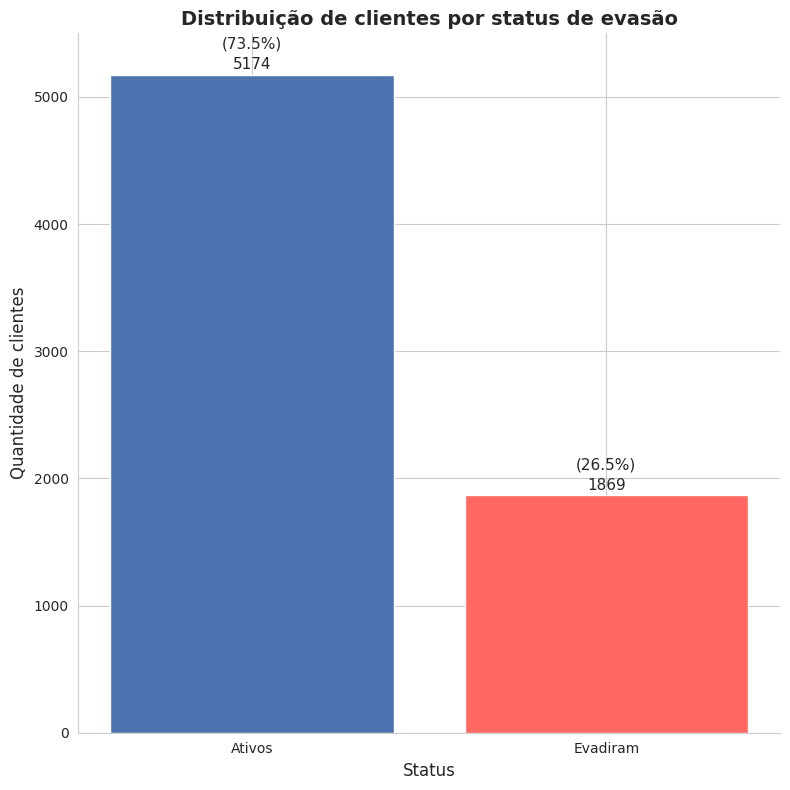

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
status = ['Ativos', 'Evadiram']
quantidade = [5174, 1869]
proporcao = ['73.5%', '26.5%']

# Ordena√ß√£o decrescente
sorted_data = sorted(zip(quantidade, status, proporcao), reverse=True)
quantidade_sorted, status_sorted, proporcao_sorted = zip(*sorted_data)

# Estilo
sns.set_style("whitegrid")

# Tamanho ajustado do gr√°fico
fig, ax = plt.subplots(figsize=(8, 8))

# Cores
colors = ['#4C72B0', '#FF6961']

# Barras
bars = ax.bar(status_sorted, quantidade_sorted, color=colors)

# R√≥tulos acima das barras
for bar, qtd, pct in zip(bars, quantidade_sorted, proporcao_sorted):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 20, f'{qtd}', ha='center', va='bottom', fontsize=11)
    ax.text(bar.get_x() + bar.get_width()/2, height + 180, f'({pct})', ha='center', va='bottom', fontsize=11)

# T√≠tulo e eixos
ax.set_title('Distribui√ß√£o de clientes por status de evas√£o', fontsize=14, weight='bold')
ax.set_ylabel('Quantidade de clientes', fontsize=12)
ax.set_xlabel('Status', fontsize=12)

# Eixo Y
ax.set_ylim(0, 5500)
ax.set_yticks(range(0, 5501, 1000))

# Remo√ß√£o das bordas superior e direita
sns.despine(top=True, right=True)

# Layout final
plt.tight_layout()
plt.savefig('distribuicao_clientes_evasao.png')
plt.show()

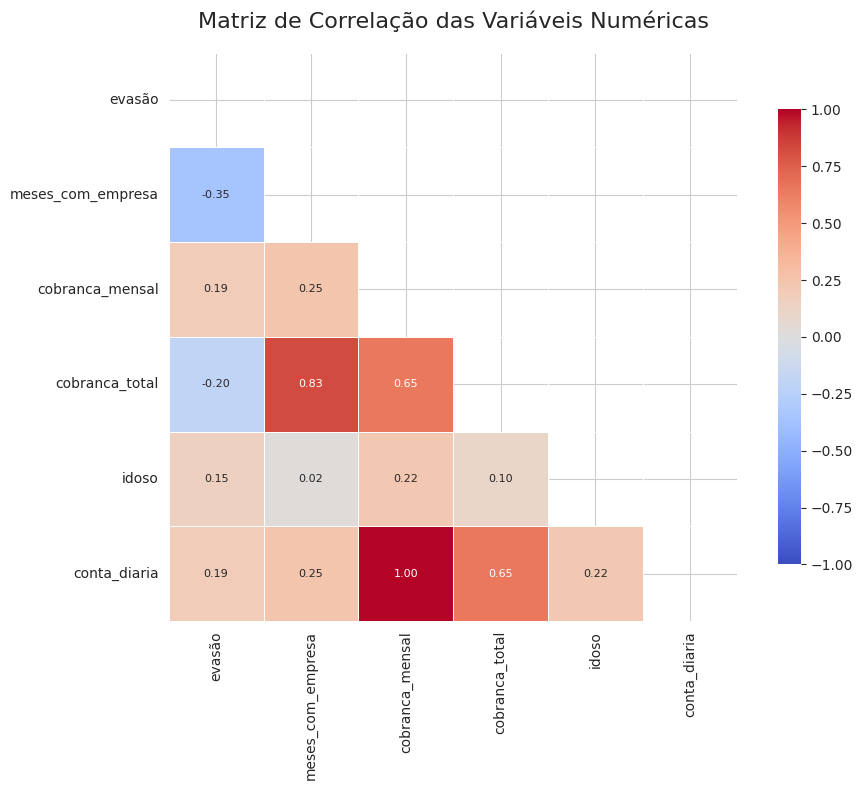

In [16]:
import numpy as np

# Selecionando as colunas num√©ricas
valores_numericos = df.select_dtypes(include=['int64', 'float64', 'bool'])


# Calculando a matriz de correla√ß√£o
matriz_correlacao = valores_numericos.corr()

# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 8},
            cbar_kws={"shrink": .8},
            vmin=-1,
            vmax=1,
            mask=np.triu(matriz_correlacao),
            square=True)

plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas', fontsize=16, pad=18)
plt.tight_layout()
plt.savefig('matriz_correlacao_numericas.png')
plt.show()

Interpreta√ß√£o da Correla√ß√£o

Evas√£o x Meses com a empresa ‚Üí -0.35
Correla√ß√£o negativa moderada ‚Üí quanto mais tempo o cliente permanece, menor a chance de evas√£o.

Evas√£o x Cobran√ßa mensal / Conta di√°ria ‚Üí 0.19
Correla√ß√£o fraca, mas positiva ‚Üí clientes que pagam mais por m√™s ou por dia t√™m um pouco mais de chance de evadir. Por estar associado ao custo-benef√≠cio.

Evas√£o x Cobran√ßa total ‚Üí -0.20
Correla√ß√£o negativa fraca ‚Üí clientes que j√° gastaram bastante no total tendem a permanecer.

Evas√£o x Idoso ‚Üí 0.15
Correla√ß√£o bem fraca ‚Üí idosos evadem um pouco mais, mas n√£o √© t√£o significativo.

## Cria√ß√£o e an√°lises gr√°ficas

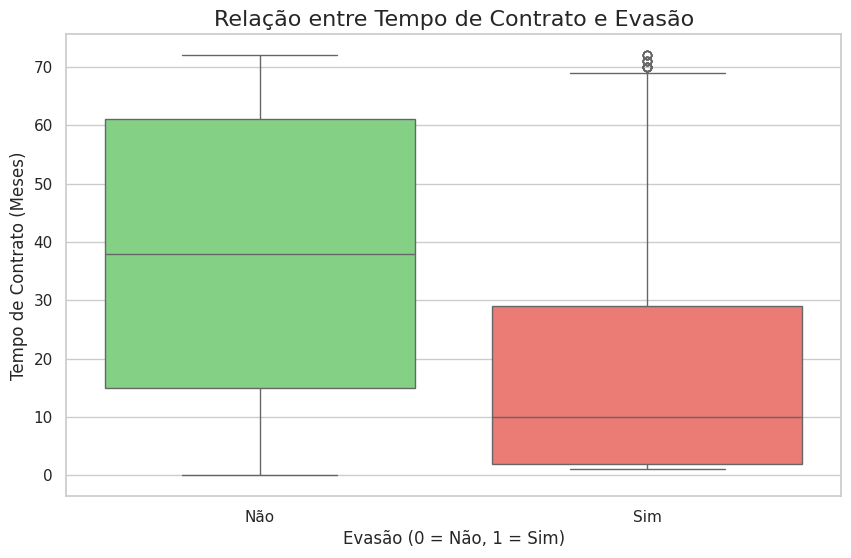

In [17]:
# Configurar o estilo dos gr√°ficos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Garantir que a coluna 'evas√£o' exista e seja num√©rica antes de mapear
# (Isso √© para garantir que a c√©lula funcione mesmo se executada isoladamente)
if 'evas√£o' in df.columns and pd.api.types.is_numeric_dtype(df['evas√£o']):
    # Se 'evas√£o' j√° √© num√©rica (0 ou 1), criar o r√≥tulo diretamente
    df['evas√£o_Label'] = df['evas√£o'].map({0: 'Ativo', 1: 'Evadiu'})
elif 'evas√£o' in df.columns and pd.api.types.is_object_dtype(df['evas√£o']):
     # If 'evas√£o' is still object type, perform mapping to numeric first
     df['evas√£o'] = df['evas√£o'].map({'no': 0, 'yes': 1})
     df['evas√£o_Label'] = df['evas√£o'].map({0: 'Ativo', 1: 'Evadiu'})
else:
    # Caso a coluna 'evas√£o' n√£o seja encontrada ou esteja em um formato inesperado
    print("Coluna 'evas√£o' n√£o encontrada ou n√£o est√° no formato esperado.")
    # Adicione aqui o tratamento adequado para esta situa√ß√£o, se necess√°rio


# Definir a paleta de cores para os gr√°ficos
paleta_cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Criar a coluna 'evas√£o_Label' mapeando os valores num√©ricos para r√≥tulos de texto
# df['evas√£o_Label'] = df['evas√£o'].map({0: 'Ativo', 1: 'Evadiu'}) # Esta linha j√° est√° inclu√≠da no bloco if/elif acima


# Gr√°fico 1: Boxplot de Tempo de Contrato (tenure) vs. Evas√£o (Churn) ---
plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.boxplot(x='evas√£o', # Eixo X: coluna 'evas√£o' (agora num√©rica 0/1)
            y='meses_com_empresa', # Eixo Y: coluna 'meses_com_empresa'
            ax=ax, # Usar os eixos definidos
            palette=paleta_cores, # Usar a paleta de cores definida
            linewidth=1, # Largura das linhas do boxplot
            legend=False, # N√£o mostrar a legenda padr√£o do seaborn
            hue='evas√£o_Label',  # Usar a nova coluna de r√≥tulo para diferenciar as caixas por cor
            data=df) # Usar o DataFrame 'df'

# Adicionar t√≠tulo e r√≥tulos aos eixos
plt.title('Rela√ß√£o entre Tempo de Contrato e Evas√£o', fontsize=16)
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)', fontsize=12) # R√≥tulo do eixo X
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12) # R√≥tulo do eixo Y
plt.xticks([0, 1], ['N√£o', 'Sim']) # Definir os r√≥tulos dos ticks do eixo X para 'N√£o' e 'Sim'

# Salvar o gr√°fico em um arquivo
plt.savefig('relacao_tempo_contrato_evasao.png')
# Exibir o gr√°fico
plt.show()

Rela√ß√£o entre Tempo de Contrato e Evas√£o

An√°lise:
O boxplot confirma a mesma tend√™ncia: clientes que ficaram menos tempo (mediana de 10 meses) t√™m maior evas√£o. J√° os que permanecem mais tempo (mediana pr√≥xima a 38 meses) tendem a ser fi√©is.

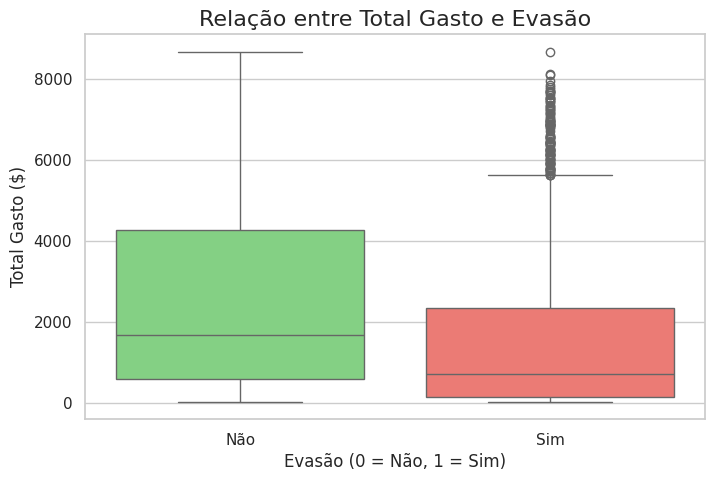

In [18]:
# Gr√°fico 2: Boxplot do Total Gasto (cobranca_total) vs. Evas√£o (evas√£o) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Garantir que a coluna 'evas√£o' exista e seja num√©rica antes de mapear
# (Isso √© para garantir que a c√©lula funcione mesmo se executada isoladamente)
if 'evas√£o' in df.columns and pd.api.types.is_numeric_dtype(df['evas√£o']):
    # Se 'evas√£o' j√° √© num√©rica (0 ou 1), criar o r√≥tulo diretamente
    df['evas√£o_Label'] = df['evas√£o'].map({0: 'Ativo', 1: 'Evadiu'})
elif 'evas√£o' in df.columns and pd.api.types.is_object_dtype(df['evas√£o']):
     # If 'evas√£o' is still object type, perform mapping to numeric first
     df['evas√£o'] = df['evas√£o'].map({'no': 0, 'yes': 1})
     df['evas√£o_Label'] = df['evas√£o'].map({0: 'Ativo', 1: 'Evadiu'})
else:
    # Caso a coluna 'evas√£o' n√£o seja encontrada ou esteja em um formato inesperado
    print("Coluna 'evas√£o' n√£o encontrada ou n√£o est√° no formato esperado.")
    # Adicione aqui o tratamento adequado para esta situa√ß√£o, se necess√°rio

# Definir a paleta de cores para os gr√°ficos
paleta_cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Criar a figura e os eixos para o gr√°fico Boxplot
plt.figure(figsize=(8, 5))
eixos = plt.gca() # Pega os eixos atuais

# Gerar o gr√°fico Boxplot
sns.boxplot(x='evas√£o', # Eixo X: coluna 'evas√£o' (agora num√©rica 0/1)
            y='cobranca_total', # Eixo Y: coluna 'cobranca_total'
            ax=eixos, # Usar os eixos definidos
            palette=paleta_cores, # Usar a paleta de cores definida
            linewidth=1, # Largura das linhas do boxplot
            legend=False, # N√£o mostrar a legenda padr√£o do seaborn (vamos criar uma personalizada depois se necess√°rio)
            hue='evas√£o_Label',  # Usar a nova coluna de r√≥tulo para diferenciar as caixas por cor
            data=df) # Usar o DataFrame 'df'

# Adicionar t√≠tulo e r√≥tulos aos eixos
plt.title('Rela√ß√£o entre Total Gasto e Evas√£o', fontsize=16)
plt.xlabel('Evas√£o (0 = N√£o, 1 = Sim)', fontsize=12) # R√≥tulo do eixo X
plt.ylabel('Total Gasto ($)', fontsize=12) # R√≥tulo do eixo Y
plt.xticks([0, 1], ['N√£o', 'Sim']) # Definir os r√≥tulos dos ticks do eixo X para 'N√£o' e 'Sim'

# Salvar o gr√°fico em um arquivo
plt.savefig('relacao_total_gasto_evasao.png')

# Exibir o gr√°fico
plt.show()

Rela√ß√£o entre Total Gasto e Evas√£o

An√°lise:
O gr√°fico mostra que clientes ativos possuem um gasto total bem mais elevado (mediana em torno de 1700 e com v√°rios chegando acima de 4000).
J√° os clientes que evadiram apresentam gasto total muito menor (mediana pr√≥xima de 500). Al√©m disso, observa-se que a dispers√£o entre os evadidos √© menor, com concentra√ß√£o em valores baixos de gasto, embora existam alguns outliers que gastaram bastante e mesmo assim sa√≠ram da empresa.

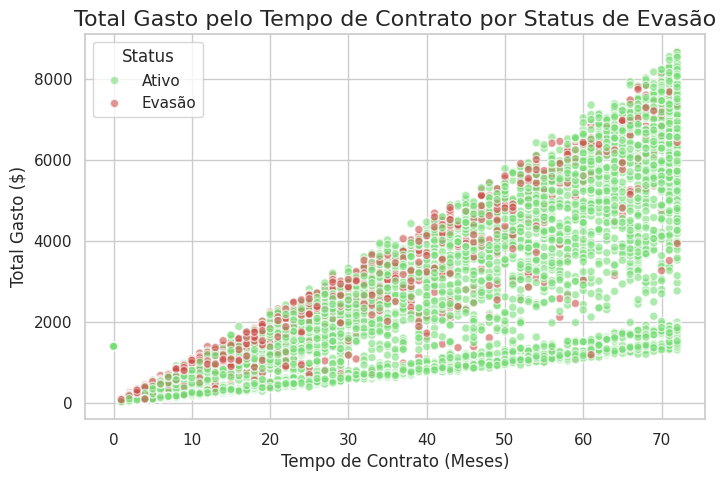

In [19]:
#Gr√°fico 3: Scatter plot do Total Gasto vs. Tempo de Contrato, colorido pela Evas√£o

cores = {'Ativo': '#77DD77', 'Evadiu': '#CC4F4A'}

plt.figure(figsize=(8, 5))
scatter_plot = sns.scatterplot(x='meses_com_empresa',
                               y='cobranca_total',
                               hue='evas√£o_Label',  # Use the new 'evas√£o_Label' column for hue
                               palette=cores,
                               legend='full',
                               linewidth=1,
                               data=df,
                               alpha=0.6)
plt.title('Total Gasto pelo Tempo de Contrato por Status de Evas√£o', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
handles, labels  =  scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles, ['Ativo', 'Evas√£o'], title='Status')
plt.savefig('total_gasto_tempo_contrato_evasao.png')
plt.show()

Total Gasto pelo Tempo de Contrato por Status de Evas√£o

An√°lise:
O gr√°fico de dispers√£o mostra um crescimento linear entre tempo de contrato e total gasto, com clientes ativos concentrados em valores mais altos e clientes evadidos mais espalhados em n√≠veis baixos de gasto.

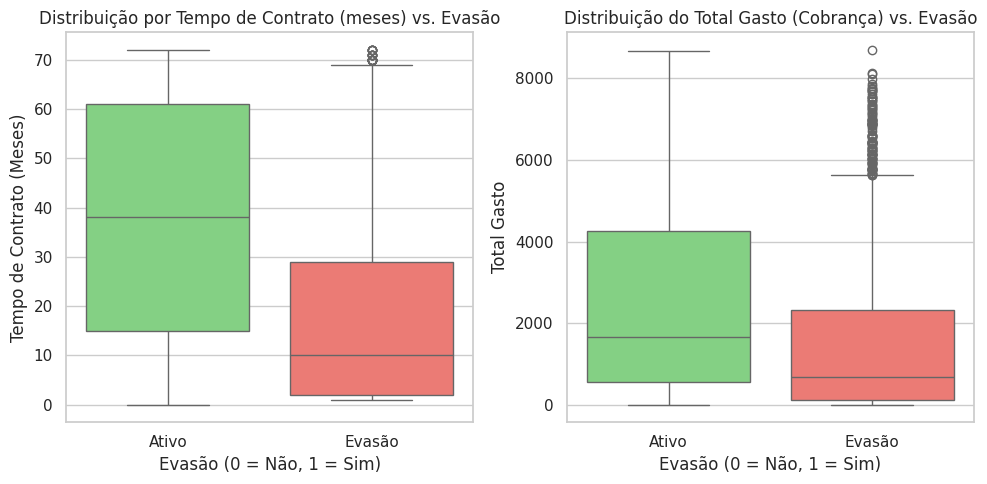

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

cores = {'Ativo': '#77DD77', 'Evadiu': '#FF6961'}

# Plot 1: Boxplot for Tenure vs. Churn
sns.boxplot(x='evas√£o',
            y='meses_com_empresa',
            palette=cores,
            hue='evas√£o_Label',
            linewidth=1,
            legend=False,
            ax=axes[0],
            data=df)

axes[0].set_title('Distribui√ß√£o por Tempo de Contrato (meses) vs. Evas√£o')
axes[0].set_xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
axes[0].set_ylabel('Tempo de Contrato (Meses)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Ativo', 'Evas√£o'])
# Plot 2: Boxplot for Total Charges vs. Churn
sns.boxplot(x='evas√£o',
            y='cobranca_total',
            palette=cores,
            hue='evas√£o_Label',
            linewidth=1,
            legend=False,
            ax=axes[1],
            data=df)

axes[1].set_title('Distribui√ß√£o do Total Gasto (Cobran√ßa) vs. Evas√£o')
axes[1].set_xlabel('Evas√£o (0 = N√£o, 1 = Sim)')
axes[1].set_ylabel('Total Gasto')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Ativo', 'Evas√£o'])

plt.tight_layout()
plt.savefig('distribuicao_tempo_contrato_evasao.png')
plt.show()

Distribui√ß√£o por Tempo de Contrato (meses) vs. Evas√£o

An√°lise:
O gr√°fico mostra que clientes ativos possuem maior tempo de contrato (mediana pr√≥xima a 38 meses), enquanto os clientes que evadiram t√™m tempo bem menor (mediana pr√≥xima a 10 meses).
Distribui√ß√£o do total gasto(Cobran√ßa) vs. Evas√£o
An√°lise:
Os clientes ativos apresentam valores significativamente maiores de gasto total (mediana acima de 1700), enquanto clientes evadidos t√™m gasto bem menor (mediana em torno de 500).

## Iniciando Modelagem preditiva

Modelagem preditiva √© uma forma de usar dados do passado para tentar descobrir o que pode acontecer no futuro. Ela ajuda a fazer previs√µes e tomar decis√µes com mais seguran√ßa, usando ferramentas como estat√≠stica e intelig√™ncia artificial


---

Separando os dados para treino e teste

In [21]:
# Importando biblioteca para treino e teste
from sklearn.model_selection import train_test_split

In [22]:
# Determinando a vari√°vel reposta
X = df_encoded.drop('evas√£o', axis=1)
y = df_encoded['evas√£o']

In [23]:
# Armazenando as vari√°veis treino e teste e separando para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [24]:
print("Propor√ß√£o de evas√£o no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nPropor√ß√£o de evas√£o no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Propor√ß√£o de evas√£o no conjunto de treino:
evas√£o
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Propor√ß√£o de evas√£o no conjunto de teste:
evas√£o
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Balanceamento dos dados

In [25]:
# Importando a classe SMOTE da biblioteca imblearn
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE()
X_balanceado, y_balanceado = smote.fit_resample(X_train, y_train)

In [27]:
y_balanceado.value_counts(normalize=True)

evas√£o
0    0.5
1    0.5
Name: proportion, dtype: float64

## Normalizando os dados

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Criando o dataset normalizado
X_train_norm = scaler.fit_transform(X_balanceado)
X_test_norm = scaler.transform(X_test)

## Desenvolvimento de modelos

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Contruindo o modelo
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [30]:
# Fazer a previs√£o do modelo
y_pred_rf = modelo_rf.predict(X_test)


Resultados do Random Forest: 
              precision    recall  f1-score   support

       Ativo       0.83      0.90      0.86      1552
      Evas√£o       0.63      0.48      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113


AUC: 0.6876349532315269

Matriz de Confus√£o: 


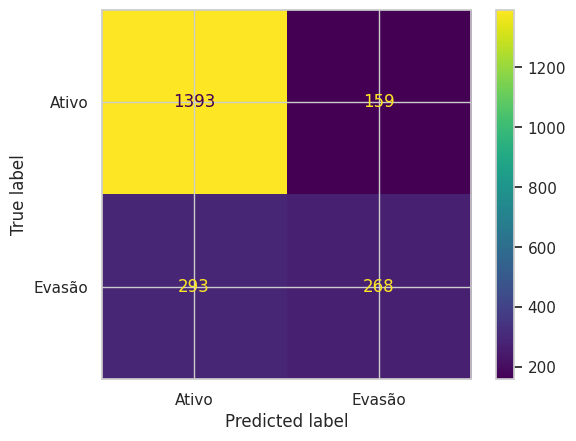

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, classification_report

print("\nResultados do Random Forest: ")
report_rf = classification_report(y_test, y_pred_rf, target_names=['Ativo', 'Evas√£o'])
print(report_rf)
print(f"\nAUC: {roc_auc_score(y_test, y_pred_rf)}")
print("\nMatriz de Confus√£o: ")
cm_rf = ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, display_labels=['Ativo', 'Evas√£o'])

## Modelo log√≠stico

In [32]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
modelo_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [33]:
# Fazer a previs√£o no conjunto de teste
y_pred_lr = modelo_log.predict(X_test)


Resultados da Regress√£o Log√≠stica:
              precision    recall  f1-score   support

       Ativo       0.91      0.72      0.80      1552
      Evas√£o       0.51      0.81      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113



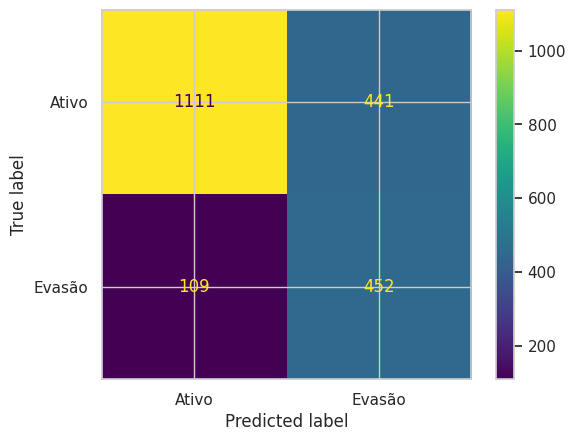

In [34]:
# Avaliar o modelo
print("\nResultados da Regress√£o Log√≠stica:")
report_lr = classification_report(y_test, y_pred_lr, target_names=['Ativo', 'Evas√£o'])
print(report_lr)
cm_lr = ConfusionMatrixDisplay.from_estimator(modelo_log, X_test, y_test, display_labels=['Ativo', 'Evas√£o'])

## Avaliando os modelos

üìä Avalia√ß√£o dos Modelos ‚Äì Regress√£o Log√≠stica vs Random Forest
Modelo 1 ‚Äì Regress√£o Log√≠stica

Acur√°cia: 73%

Precis√£o (Evas√£o): 50%

Recall (Evas√£o): 80%

F1-Score (Evas√£o): 0.61

Pontos fortes: Encontra 8 em cada 10 evas√µes ‚Üí √≥timo para campanhas de reten√ß√£o.
Ponto fraco: Muitos falsos positivos (metade dos alertas n√£o s√£o de evas√µes).

Modelo 2 ‚Äì Random Forest

Acur√°cia: 79%

Precis√£o (Churn): 63%

Recall (Churn): 47%

F1-Score (Churn): 0.54

Pontos fortes: Alertas mais confi√°veis, menos falsos positivos.
Ponto fraco: Perde mais da metade das evas√µes reais.

üîé Compara√ß√£o

Modelo	Pr√≥ (Foco em Evas√£o)

Contra	Ideal para:

Regress√£o Log√≠stica	Recall alto (80%) ‚Äì captura a maioria das evas√µes	Precis√£o moderada (50%) ‚Äì muitos falsos alarmes	Reten√ß√£o em massa

Random Forest	Precis√£o boa (63%) ‚Äì alertas mais confi√°veis	Recall baixo (47%) ‚Äì perde muitas evas√µes,	Campanhas seletivas e de alto custo

üìå Conclus√£o

Vencedor inicial: Regress√£o Log√≠stica, por identificar a maioria dos clientes que iriam cancelar (prioridade do neg√≥cio).

Random Forest: Apesar da maior acur√°cia, n√£o atende bem ao objetivo principal (recall baixo). Deve ser otimizado (hiperpar√¢metros) e usado futuramente em campanhas mais segmentadas.

üëâ Estrat√©gia recomendada:

Implantar Regress√£o Log√≠stica para cobertura ampla de evas√£o.

Trabalhar em paralelo na otimiza√ß√£o do Random Forest para cen√°rios de reten√ß√£o mais espec√≠ficos e de alto custo.

## Identifica√ß√£o dos fatores mais influentes

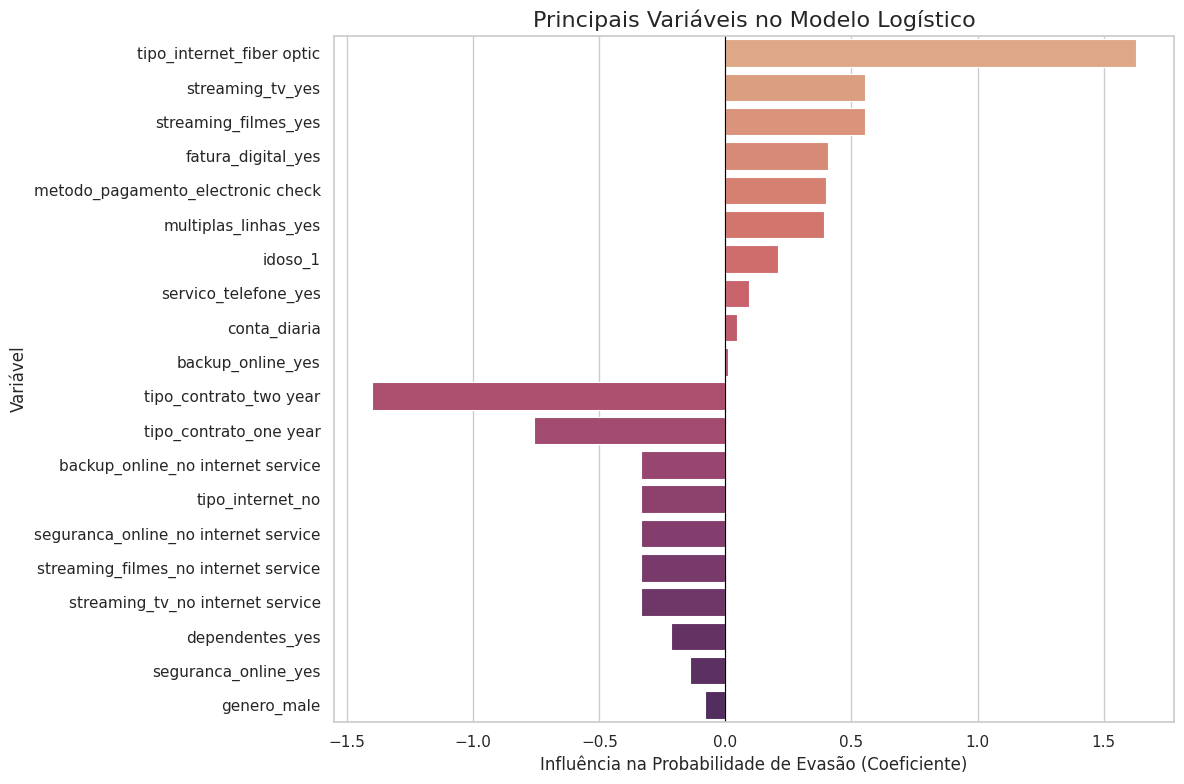

In [50]:
coefficients = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': modelo_log.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

positive_coeffs = coefficients.head(10)
negative_coeffs = coefficients.tail(10).sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(12, 8))
coeffs_to_plot = pd.concat([positive_coeffs, negative_coeffs])
sns.barplot(x='Coeficiente',
            y='Vari√°vel',
            data=coeffs_to_plot,
            palette='flare',
            hue='Vari√°vel',
            linewidth=0.8)

plt.title('Principais Vari√°veis no Modelo Log√≠stico', fontsize=16)
plt.xlabel('Influ√™ncia na Probabilidade de Evas√£o (Coeficiente)', fontsize=12)
plt.ylabel('Vari√°vel', fontsize=12)
plt.axvline(0, color='black', lw=0.8)
plt.tight_layout()
plt.savefig('fatores_mais_influentes.png')
plt.show()

## Vari√°veis que influenciam na probabilidade de evas√£o

Esses t√™m coeficientes positivos ‚Äî ou seja, est√£o associados a maior risco de evas√£o:

- 1. tipo_internet_fiber optic: curioso, n√©? Mesmo sendo uma tecnologia avan√ßada, pode estar ligada a clientes mais exigentes ou com planos mais caros.

- 2. streaming_tv_yes / streaming_filmes_yes: pode indicar perfis mais digitais, que talvez busquem alternativas mais baratas ou flex√≠veis.

- 3. fatura_digital_yes: talvez correlacionado com menor engajamento ou menor contato humano.

- 4. metodo_pagamento_electronic check: pode sugerir menor fideliza√ß√£o.

- 5. multiplas_linhas_yes: clientes com m√∫ltiplas linhas podem ser mais vol√°teis.

- 6. idoso_1: esse √© sens√≠vel ‚Äî pode indicar desafios com tecnologia ou mudan√ßas de perfil de consumo.

- 7. servico_telefone_yes / conta_diaria / backup_online_yes: servi√ßos adicionais nem sempre significam reten√ß√£o, especialmente se n√£o forem percebidos como √∫teis.

## Fatores que reduzem a probabilidade de evas√£o

# Coeficientes negativos ‚Äî associados √† perman√™ncia:

- 1. tipo_contrato_two year / one year: contratos mais longos claramente ajudam na reten√ß√£o.

- 2. backup_online_no internet service / tipo_internet_no: aus√™ncia de servi√ßo pode indicar clientes que j√° sa√≠ram ou est√£o em planos b√°sicos.

- 3. seguranca_online_no internet service / streaming_no internet service: refor√ßa o padr√£o acima.

- 4. dependentes_yes: clientes com dependentes tendem a manter o servi√ßo.

- 5. seguranca_online_yes / genero_male: podem indicar perfis mais est√°veis ou menos propensos √† mudan√ßa.

## Insight geral:

Seu modelo est√° captando nuances interessantes ‚Äî como o paradoxo de servi√ßos digitais estarem associados √† evas√£o. Isso pode ser explorado em estrat√©gias de reten√ß√£o mais personalizadas, como ofertas espec√≠ficas para usu√°rios com m√∫ltiplas linhas ou servi√ßos de streaming.


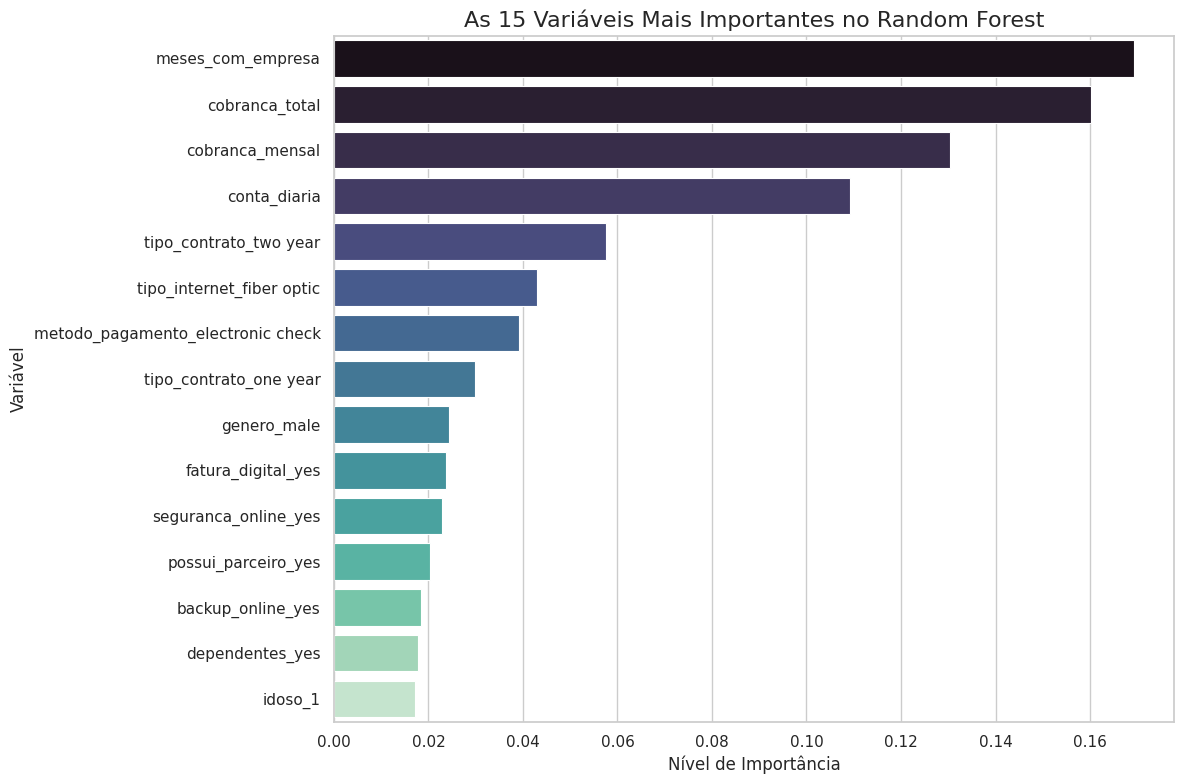

In [48]:
feature_importance = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Import√¢ncia': modelo_rf.feature_importances_
}).sort_values(by='Import√¢ncia', ascending=False)


top_15_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Import√¢ncia',
            y='Vari√°vel',
            data=top_15_features,
            palette='mako',
            hue='Vari√°vel',
            linewidth=0.8)

plt.title('As 15 Vari√°veis Mais Importantes no Random Forest', fontsize=16)
plt.xlabel('N√≠vel de Import√¢ncia', fontsize=12)
plt.ylabel('Vari√°vel', fontsize=12)
plt.savefig('as_15_variaveis_mais_importantes.png')
plt.tight_layout()
plt.show()

# Top 5 vari√°veis mais influentes no Random Forest

- 1. meses_com_empresa

- Quanto mais tempo o cliente est√° na empresa, menor a chance de evas√£o. Esse √© o fator mais decisivo ‚Äî fidelidade conta muito!

- 2. cobran√ßa_total

- Clientes com valores acumulados mais altos podem estar mais propensos a sair, talvez por insatisfa√ß√£o ou custo percebido.

- 3. cobran√ßa_mensal

- Similar ao anterior, refor√ßa que o pre√ßo mensal impacta diretamente na perman√™ncia.

- 4. conta_diaria

- Pode indicar clientes com uso mais intenso ou cobran√ßa diferenciada ‚Äî e talvez maior risco de evas√£o se n√£o houver percep√ß√£o de valor.

- 5. tipo_contrato_two year

- Contratos mais longos s√£o um escudo contra evas√£o, como j√° vimos no modelo log√≠stico.

## Outras variaveis relevantes

- tipo_internet_fiber optic: aparece de novo como fator de risco ‚Äî talvez por expectativas mais altas ou concorr√™ncia.
- metodo_pagamento_electronic check: continua sendo um sinal de menor fideliza√ß√£o.
- fatura_digital_yes e backup_online_yes: podem indicar perfis mais digitais, mas tamb√©m menos engajados.
- idoso_1 e dependentes_yes: mostram que caracter√≠sticas demogr√°ficas influenciam bastante.

## Insight cruzado com o modelo log√≠stico

O Random Forest refor√ßa muitos dos achados do modelo log√≠stico, mas com uma diferen√ßa: ele d√° mais peso a vari√°veis quantitativas como tempo de contrato e valores de cobran√ßa. Isso mostra que ele est√° captando padr√µes mais complexos e n√£o apenas rela√ß√µes lineares.


## üìä Relat√≥rio Final ‚Äì An√°lise de Evas√£o de Clientes da Telecom X

#1. Objetivo

O estudo teve como prop√≥sito identificar fatores que influenciam a evas√£o (churn) dos clientes da Telecom X, bem como avaliar modelos preditivos capazes de antecipar esse comportamento. O foco estrat√©gico √© reduzir a perda de clientes, aumentando a efetividade das campanhas de reten√ß√£o.

#2. Avalia√ß√£o dos Modelos Preditivos

Foram comparados dois algoritmos: Regress√£o Log√≠stica e Random Forest, ambos treinados com pondera√ß√£o de classes para lidar com o desbalanceamento entre clientes que permanecem e os que cancelam.

##üîπ Modelo 1 ‚Äì Modelo log√≠stico

Recall (Evas√£o): 80% ‚Üí identifica 8 em cada 10 clientes que realmente cancelariam.

Precis√£o (Evas√£o): 50% ‚Üí metade dos alertas s√£o falsos positivos.

Acur√°cia Geral: 73%

F1-Score (Evas√£o): 0.61

#Interpreta√ß√£o: O modelo prioriza recall, garantindo que a maioria das evas√µes sejam encontradas, ainda que com custo de falsos alarmes.

##üîπ Modelo 2 ‚Äì Random Forest

Recall (Evas√£o): 47% ‚Üí perde mais da metade das eva√ß√µes.

Precis√£o (Evas√£o): 63% ‚Üí mais confi√°vel nos alertas emitidos.

Acur√°cia Geral: 79%

F1-Score (Evas√£o): 0.54

#Interpreta√ß√£o: O modelo √© mais conservador, com menos falsos positivos, mas falha no objetivo principal de identificar quem realmente cancelaria.

##üîπ Conclus√£o Comparativa

Melhor para reten√ß√£o em massa: Regress√£o Log√≠stica (maior recall).

Melhor para campanhas de alto custo: Random Forest (maior precis√£o).

##üëâ Recomenda√ß√£o inicial: implantar a Regress√£o Log√≠stica, por capturar a maior parte dos churners e oferecer maior impacto no neg√≥cio. O Random Forest deve ser otimizado para usos futuros, como campanhas mais segmentadas.

#3. Diagn√≥stico de Ajuste (Overfitting/Underfitting)

Modelo log√≠stico: bom ajuste, sem sinais de overfitting. Aten√ß√£o apenas para a precis√£o baixa, que pode ser trabalhada ajustando o limiar de decis√£o.

Random Forest: n√£o houve overfitting cl√°ssico, mas sim dificuldade em generalizar para a classe minorit√°ria. Recomendado: otimiza√ß√£o de hiperpar√¢metros (max_depth, n_estimators, min_samples_leaf) visando maior recall.

##4. Vari√°veis que Influenciam a Evas√£o

üîπ Fatores de risco (associados a maior probabilidade de churn)

tipo_internet_fiber optic ‚Üí clientes exigentes ou em planos caros.

streaming_tv_yes / streaming_filmes_yes ‚Üí perfis digitais que buscam alternativas mais baratas.

fatura_digital_yes ‚Üí menos contato humano.

metodo_pagamento_electronic check ‚Üí menor fideliza√ß√£o.

multiplas_linhas_yes ‚Üí maior volatilidade.

idoso_1 ‚Üí poss√≠veis barreiras tecnol√≥gicas.

servi√ßos adicionais (telefone, backup, conta_diaria) ‚Üí quando n√£o s√£o percebidos como √∫teis, podem gerar insatisfa√ß√£o.

üîπ Fatores de reten√ß√£o (associados a menor probabilidade de churn)

tipo_contrato_two year / one year ‚Üí contratos longos aumentam reten√ß√£o.

dependentes_yes ‚Üí clientes com dependentes tendem a manter o servi√ßo.

seguranca_online_yes ‚Üí associado a maior perman√™ncia.

genero_male ‚Üí perfil mais est√°vel.

aus√™ncia de internet/servi√ßos digitais ‚Üí indica planos b√°sicos ou clientes j√° fidelizados.

##5. Import√¢ncia das Vari√°veis no Random Forest

O modelo destacou como mais influentes:

meses_com_empresa ‚Üí quanto mais tempo, menor a evas√£o.

cobran√ßa_total ‚Üí valores acumulados altos aumentam risco de sa√≠da.

cobran√ßa_mensal ‚Üí pre√ßo mensal impacta fortemente a perman√™ncia.

conta_diaria ‚Üí pode indicar uso intenso, mas com risco se n√£o houver valor percebido.

tipo_contrato_two year ‚Üí prote√ß√£o clara contra evas√£o.

Outras relevantes: fiber optic, electronic check, fatura digital, backup online, idoso, dependentes.

##üëâ O Random Forest refor√ßa achados do modelo log√≠stico, mas valoriza vari√°veis quantitativas (tempo de contrato, valores de cobran√ßa), captando padr√µes mais complexos.

## 6. Insight Estrat√©gico

Pre√ßo e tempo de contrato s√£o determinantes para reten√ß√£o.

Perfis digitais (streaming, fatura digital, pagamento eletr√¥nico) parecem mais propensos a cancelar, possivelmente por buscarem alternativas flex√≠veis.

Clientes antigos e com contratos longos s√£o naturalmente mais fi√©is.

Clientes idosos e com m√∫ltiplas linhas exigem aten√ß√£o especial, seja com suporte diferenciado, seja com planos mais atrativos.

## 7. Conclus√£o Final

Vencedor para implanta√ß√£o imediata: Modelo log√≠stico ‚Üí maior recall, maior impacto em campanhas de reten√ß√£o em massa.

Random Forest: deve ser otimizado e considerado em estrat√©gias espec√≠ficas, principalmente quando o custo de contato for alto e a precis√£o se tornar mais relevante.

# üìå Resumo estrat√©gico:

#Usar Regress√£o Log√≠stica como modelo base de reten√ß√£o.

#Trabalhar Random Forest em paralelo, com foco em campanhas mais segmentadas.

#Direcionar a√ß√µes para clientes digitais, de alto valor e em planos mais caros, pois s√£o os mais propensos a evas√£o.

#Fortalecer a reten√ß√£o em clientes com contratos longos e dependentes, aproveitando seu maior potencial de fidelidade.